In [1]:
import tushare as ts
import pandas as pd

ts.set_token('53cd3b985c649c978160c6ec04bce24f4fbd2ebcb4673e8f2fba9a43')

pro = ts.pro_api()

data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

data.head()

C:\Users\GreenWood\Anaconda3\envs\tf_gpu_keras\lib\site-packages\tushare\util\upass.py:28: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return str(df.ix[0]['token'])


,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427


In [12]:
family_df = pd.read_csv('data/family_firm.csv')

In [13]:
family_df.head()

,Symbol,EndDate,FamEntyp,ExchangeCode,ListingBoardCode,IndustryCode,FamStyle,FamNameStatus,ManagementGenerations,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion
0,4,12/31/2017,1.0,SZSE,P3401,C27,2,"1,2,3,4,5",1.0,29.87,1,28.43,29.87
1,5,12/31/2017,1.0,SZSE,P3401,N77,2,"1,5",1.0,21.15,1,17.41,21.15
2,7,12/31/2017,3.0,SZSE,P3401,K70,2,"1,2,4,5",NaN,19.18,1,13.53,20.82
3,10,12/31/2017,1.0,SZSE,P3401,E48,2,5,NaN,21.51,1,21.51,21.51
4,12,12/31/2017,1.0,SZSE,P3401,C30,2,5,NaN,25.34,1,14.84,25.34


In [14]:
family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 13 columns):
Symbol                   2268 non-null int64
EndDate                  2268 non-null object
FamEntyp                 2232 non-null float64
ExchangeCode             2268 non-null object
ListingBoardCode         2268 non-null object
IndustryCode             2268 non-null object
FamStyle                 2268 non-null int64
FamNameStatus            2268 non-null object
ManagementGenerations    1901 non-null float64
ContrshrProportion       2267 non-null object
IsRelatedTrading         2268 non-null int64
ShareholderFirstProp     2268 non-null float64
ControlProportion        2253 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 230.5+ KB


In [15]:
FamEntyp_one_hot = pd.get_dummies(family_df['FamEntyp'], prefix='FamEntyp')

In [16]:
family_df = pd.concat([family_df, FamEntyp_one_hot], axis=1)

In [18]:
family_df.head()

,Symbol,EndDate,FamEntyp,ExchangeCode,ListingBoardCode,IndustryCode,FamStyle,FamNameStatus,ManagementGenerations,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0
0,4,12/31/2017,1.0,SZSE,P3401,C27,2,"1,2,3,4,5",1.0,29.87,1,28.43,29.87,1,0,0
1,5,12/31/2017,1.0,SZSE,P3401,N77,2,"1,5",1.0,21.15,1,17.41,21.15,1,0,0
2,7,12/31/2017,3.0,SZSE,P3401,K70,2,"1,2,4,5",NaN,19.18,1,13.53,20.82,0,0,1
3,10,12/31/2017,1.0,SZSE,P3401,E48,2,5,NaN,21.51,1,21.51,21.51,1,0,0
4,12,12/31/2017,1.0,SZSE,P3401,C30,2,5,NaN,25.34,1,14.84,25.34,1,0,0


In [19]:
family_df = family_df.drop(['FamEntyp'], axis=1)

In [20]:
family_df.head()

,Symbol,EndDate,ExchangeCode,ListingBoardCode,IndustryCode,FamStyle,FamNameStatus,ManagementGenerations,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0
0,4,12/31/2017,SZSE,P3401,C27,2,"1,2,3,4,5",1.0,29.87,1,28.43,29.87,1,0,0
1,5,12/31/2017,SZSE,P3401,N77,2,"1,5",1.0,21.15,1,17.41,21.15,1,0,0
2,7,12/31/2017,SZSE,P3401,K70,2,"1,2,4,5",NaN,19.18,1,13.53,20.82,0,0,1
3,10,12/31/2017,SZSE,P3401,E48,2,5,NaN,21.51,1,21.51,21.51,1,0,0
4,12,12/31/2017,SZSE,P3401,C30,2,5,NaN,25.34,1,14.84,25.34,1,0,0


In [21]:
set(family_df['ExchangeCode'])

{'SSE', 'SZSE'}

In [23]:
for i in range(len(family_df)):
    code = family_df.iloc[i, 0]
    code = str(code).zfill(6)
    if family_df.iloc[i, 2] == 'SSE':
        code += '.SH'
    else:
        code += '.SZ'
    family_df.iloc[i, 0] = code

In [24]:
family_df.head()

,Symbol,EndDate,ExchangeCode,ListingBoardCode,IndustryCode,FamStyle,FamNameStatus,ManagementGenerations,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0
0,000004.SZ,12/31/2017,SZSE,P3401,C27,2,"1,2,3,4,5",1.0,29.87,1,28.43,29.87,1,0,0
1,000005.SZ,12/31/2017,SZSE,P3401,N77,2,"1,5",1.0,21.15,1,17.41,21.15,1,0,0
2,000007.SZ,12/31/2017,SZSE,P3401,K70,2,"1,2,4,5",NaN,19.18,1,13.53,20.82,0,0,1
3,000010.SZ,12/31/2017,SZSE,P3401,E48,2,5,NaN,21.51,1,21.51,21.51,1,0,0
4,000012.SZ,12/31/2017,SZSE,P3401,C30,2,5,NaN,25.34,1,14.84,25.34,1,0,0


In [25]:
family_df = family_df.drop(['ExchangeCode'], axis=1)

In [26]:
family_df.head()

,Symbol,EndDate,ListingBoardCode,IndustryCode,FamStyle,FamNameStatus,ManagementGenerations,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0
0,000004.SZ,12/31/2017,P3401,C27,2,"1,2,3,4,5",1.0,29.87,1,28.43,29.87,1,0,0
1,000005.SZ,12/31/2017,P3401,N77,2,"1,5",1.0,21.15,1,17.41,21.15,1,0,0
2,000007.SZ,12/31/2017,P3401,K70,2,"1,2,4,5",NaN,19.18,1,13.53,20.82,0,0,1
3,000010.SZ,12/31/2017,P3401,E48,2,5,NaN,21.51,1,21.51,21.51,1,0,0
4,000012.SZ,12/31/2017,P3401,C30,2,5,NaN,25.34,1,14.84,25.34,1,0,0


In [27]:
family_df = family_df.drop(['EndDate'], axis=1)

In [29]:
board_code_one_hot = pd.get_dummies(family_df['ListingBoardCode'], prefix='BoardCode')

In [30]:
family_df = pd.concat([family_df, board_code_one_hot], axis=1)

In [31]:
family_df.head()

,Symbol,ListingBoardCode,IndustryCode,FamStyle,FamNameStatus,ManagementGenerations,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0,BoardCode_P3401,BoardCode_P3402,BoardCode_P3403
0,000004.SZ,P3401,C27,2,"1,2,3,4,5",1.0,29.87,1,28.43,29.87,1,0,0,1,0,0
1,000005.SZ,P3401,N77,2,"1,5",1.0,21.15,1,17.41,21.15,1,0,0,1,0,0
2,000007.SZ,P3401,K70,2,"1,2,4,5",NaN,19.18,1,13.53,20.82,0,0,1,1,0,0
3,000010.SZ,P3401,E48,2,5,NaN,21.51,1,21.51,21.51,1,0,0,1,0,0
4,000012.SZ,P3401,C30,2,5,NaN,25.34,1,14.84,25.34,1,0,0,1,0,0


In [32]:
family_df = family_df.drop(['ListingBoardCode'], axis=1)

In [35]:
set(family_df['FamStyle'])

{1, 2}

In [36]:
famstyle_one_hot = pd.get_dummies(family_df['FamStyle'], prefix='FamStyle')
family_df = pd.concat([family_df, famstyle_one_hot], axis=1)

In [37]:
family_df = family_df.drop(['FamStyle'], axis=1)

In [38]:
family_df.head()

,Symbol,IndustryCode,FamNameStatus,ManagementGenerations,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0,BoardCode_P3401,BoardCode_P3402,BoardCode_P3403,FamStyle_1,FamStyle_2
0,000004.SZ,C27,"1,2,3,4,5",1.0,29.87,1,28.43,29.87,1,0,0,1,0,0,0,1
1,000005.SZ,N77,"1,5",1.0,21.15,1,17.41,21.15,1,0,0,1,0,0,0,1
2,000007.SZ,K70,"1,2,4,5",NaN,19.18,1,13.53,20.82,0,0,1,1,0,0,0,1
3,000010.SZ,E48,5,NaN,21.51,1,21.51,21.51,1,0,0,1,0,0,0,1
4,000012.SZ,C30,5,NaN,25.34,1,14.84,25.34,1,0,0,1,0,0,0,1


In [39]:
generation_one_hot = pd.get_dummies(family_df['ManagementGenerations'], prefix='ManGeneration')
family_df = pd.concat([family_df, generation_one_hot], axis=1)

family_df = family_df.drop(['ManagementGenerations'], axis=1)

In [40]:
family_df.head()

,Symbol,IndustryCode,FamNameStatus,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0,BoardCode_P3401,BoardCode_P3402,BoardCode_P3403,FamStyle_1,FamStyle_2,ManGeneration_1.0,ManGeneration_2.0
0,000004.SZ,C27,"1,2,3,4,5",29.87,1,28.43,29.87,1,0,0,1,0,0,0,1,1,0
1,000005.SZ,N77,"1,5",21.15,1,17.41,21.15,1,0,0,1,0,0,0,1,1,0
2,000007.SZ,K70,"1,2,4,5",19.18,1,13.53,20.82,0,0,1,1,0,0,0,1,0,0
3,000010.SZ,E48,5,21.51,1,21.51,21.51,1,0,0,1,0,0,0,1,0,0
4,000012.SZ,C30,5,25.34,1,14.84,25.34,1,0,0,1,0,0,0,1,0,0


In [41]:
family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 17 columns):
Symbol                  2268 non-null object
IndustryCode            2268 non-null object
FamNameStatus           2268 non-null object
ContrshrProportion      2267 non-null object
IsRelatedTrading        2268 non-null int64
ShareholderFirstProp    2268 non-null float64
ControlProportion       2253 non-null float64
FamEntyp_1.0            2268 non-null uint8
FamEntyp_2.0            2268 non-null uint8
FamEntyp_3.0            2268 non-null uint8
BoardCode_P3401         2268 non-null uint8
BoardCode_P3402         2268 non-null uint8
BoardCode_P3403         2268 non-null uint8
FamStyle_1              2268 non-null uint8
FamStyle_2              2268 non-null uint8
ManGeneration_1.0       2268 non-null uint8
ManGeneration_2.0       2268 non-null uint8
dtypes: float64(2), int64(1), object(4), uint8(10)
memory usage: 146.3+ KB


In [55]:
contr_without_nan = family_df['ContrshrProportion'].dropna()

In [56]:
family_df.iloc[393]

Symbol                   002326.SZ
IndustryCode                   C26
FamNameStatus                1,2,5
ContrshrProportion      41.2,47.33
IsRelatedTrading                 1
ShareholderFirstProp         23.15
ControlProportion            53.46
FamEntyp_1.0                     0
FamEntyp_2.0                     0
FamEntyp_3.0                     1
BoardCode_P3401                  0
BoardCode_P3402                  1
BoardCode_P3403                  0
FamStyle_1                       1
FamStyle_2                       0
ManGeneration_1.0                1
ManGeneration_2.0                0
Name: 393, dtype: object

In [60]:
contr_without_nan[1845]

'45.12,46.44'

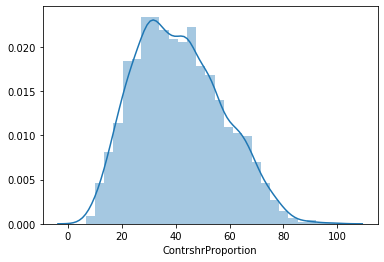

In [61]:
import seaborn as sns
contr_without_nan[393] = (41.2 + 47.33) / 2
contr_without_nan[1017] = (32.11 + 32.49) / 2
contr_without_nan[1845] = (45.12 + 46.44) / 2
contr_without_nan = pd.to_numeric(contr_without_nan)
sns.distplot(contr_without_nan)

In [62]:
family_df.iloc[393, 3] = (41.2 + 47.33) / 2
family_df.iloc[1017, 3] = (32.11 + 32.49) / 2
family_df.iloc[1845, 3] = (45.12 + 46.44) / 2

In [63]:
family_df['ContrshrProportion'] = pd.to_numeric(family_df['ContrshrProportion'])

In [64]:
family_df['ContrshrProportion'] = family_df['ContrshrProportion'].fillna(family_df['ContrshrProportion'].mean())

In [67]:
conprotion_without_nan = family_df['ControlProportion'].dropna()

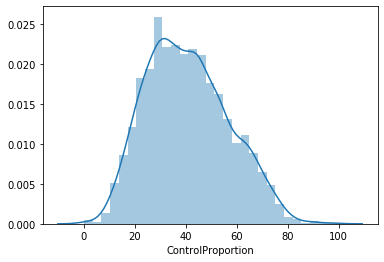

In [68]:
sns.distplot(conprotion_without_nan)

In [69]:
family_df['ControlProportion'] = family_df['ControlProportion'].fillna(family_df['ControlProportion'].mean())

In [71]:
family_df.head()

,Symbol,IndustryCode,FamNameStatus,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0,BoardCode_P3401,BoardCode_P3402,BoardCode_P3403,FamStyle_1,FamStyle_2,ManGeneration_1.0,ManGeneration_2.0
0,000004.SZ,C27,"1,2,3,4,5",29.87,1,28.43,29.87,1,0,0,1,0,0,0,1,1,0
1,000005.SZ,N77,"1,5",21.15,1,17.41,21.15,1,0,0,1,0,0,0,1,1,0
2,000007.SZ,K70,"1,2,4,5",19.18,1,13.53,20.82,0,0,1,1,0,0,0,1,0,0
3,000010.SZ,E48,5,21.51,1,21.51,21.51,1,0,0,1,0,0,0,1,0,0
4,000012.SZ,C30,5,25.34,1,14.84,25.34,1,0,0,1,0,0,0,1,0,0


In [72]:
set(family_df['IsRelatedTrading'])

{0, 1}

In [79]:
family_df.loc[0]

Symbol                  000004.SZ
IndustryCode                  C27
FamNameStatus           1,2,3,4,5
ContrshrProportion          29.87
IsRelatedTrading                1
ShareholderFirstProp        28.43
ControlProportion           29.87
FamEntyp_1.0                    1
FamEntyp_2.0                    0
FamEntyp_3.0                    0
BoardCode_P3401                 1
BoardCode_P3402                 0
BoardCode_P3403                 0
FamStyle_1                      0
FamStyle_2                      1
ManGeneration_1.0               1
ManGeneration_2.0               0
Name: 0, dtype: object

In [80]:
for i in range(1, 6):
    family_df['FamNameStatus_{}'.format(i)] = family_df.apply(lambda x: 1 if str(i) in x.FamNameStatus else 0, axis=1)

In [83]:
family_df.head()

,Symbol,IndustryCode,FamNameStatus,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0,...,BoardCode_P3403,FamStyle_1,FamStyle_2,ManGeneration_1.0,ManGeneration_2.0,FamNameStatus_1,FamNameStatus_2,FamNameStatus_3,FamNameStatus_4,FamNameStatus_5
0,000004.SZ,C27,"1,2,3,4,5",29.87,1,28.43,29.87,1,0,0,...,0,0,1,1,0,1,1,1,1,1
1,000005.SZ,N77,"1,5",21.15,1,17.41,21.15,1,0,0,...,0,0,1,1,0,1,0,0,0,1
2,000007.SZ,K70,"1,2,4,5",19.18,1,13.53,20.82,0,0,1,...,0,0,1,0,0,1,1,0,1,1
3,000010.SZ,E48,5,21.51,1,21.51,21.51,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,000012.SZ,C30,5,25.34,1,14.84,25.34,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [84]:
indcode_one_hot = pd.get_dummies(family_df['IndustryCode'], prefix='IndustryCode')
family_df = pd.concat([family_df, indcode_one_hot], axis=1)

family_df = family_df.drop(['IndustryCode', 'FamNameStatus'], axis=1)

In [85]:
family_df.shape

(2268, 97)

In [86]:
family_df.head()

,Symbol,ContrshrProportion,IsRelatedTrading,ShareholderFirstProp,ControlProportion,FamEntyp_1.0,FamEntyp_2.0,FamEntyp_3.0,BoardCode_P3401,BoardCode_P3402,...,IndustryCode_N77,IndustryCode_N78,IndustryCode_O80,IndustryCode_P82,IndustryCode_Q83,IndustryCode_R85,IndustryCode_R86,IndustryCode_R87,IndustryCode_R88,IndustryCode_S90
0,000004.SZ,29.87,1,28.43,29.87,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,000005.SZ,21.15,1,17.41,21.15,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,000007.SZ,19.18,1,13.53,20.82,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,000010.SZ,21.51,1,21.51,21.51,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,000012.SZ,25.34,1,14.84,25.34,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
family_df.to_csv('data/family_firm_clean.csv')